# Using and benchmarking tensorflow wrapper on text8 corpus
[TensorFlow](https://www.tensorflow.org) is Google Brain's second generation machine learning system, 
with a reference implementation released as open source software on November 9, 2015. This tutorial will compare the time taken to train on gensim's word2vec implementation with TensorFlow's.
Before getting started you need to install [gensim](https://github.com/RaRe-Technologies/gensim/) and [setup Tensorflow](https://www.tensorflow.org/get_started/os_setup) to run with GPU support.
This wrapper has all the functionalities of the conventional word2vec of gensim.

# Training the model
We will be training the model using [lee corpus.](https://github.com/RaRe-Technologies/gensim/blob/develop/gensim/test/test_data/lee_background.cor)

In [1]:
%matplotlib inline 
import gensim
import os, time

from gensim.models.wrappers.tfword2vec import TfWord2Vec
from gensim.models.word2vec import Word2Vec, Text8Corpus

import matplotlib.pyplot as plt


Initialising the model trains it as well.


In [2]:
corpus = '../../gensim/test/test_data/lee.cor'
save_path = '.'
model = TfWord2Vec(corpus, epochs_to_train=1, embedding_size=100, batch_size=100000, save_path=save_path)
model.train()

Data file:  ../../gensim/test/test_data/lee.cor
Vocab size:  96  + UNK
Words per epoch:  3983
Data file:  ../../gensim/test/test_data/lee.cor=    83334
Vocab size:  96  + UNK
Words per epoch:  3983


This model behaves similar to the wor2vec model.

In [3]:
print(model)

In [4]:
print(model.most_similar('President'))
print(model.similarity('President', 'military'))

[('told', 0.22218063473701477), ('The', 0.1978411227464676), ('Saudi', 0.19136053323745728), ('the', 0.18330501019954681), ('one', 0.17754220962524414), ('world', 0.17289648950099945), ('a', 0.16694964468479156), ('was', 0.16650299727916718), ('after', 0.16578058898448944), ('her', 0.15404342114925385)]
0.021422123478


## Saving and loading the model

In [5]:
from tempfile import mkstemp

fs, temp_path = mkstemp("tfword2vec_temp")  # creates a temp file
print(temp_path)
#model.save(temp_path)  # save the model


/tmp/tmpimygaDtfword2vec_temp


In [6]:
#model=TfWord2Vec.load_tf_model(temp_path)


In [7]:
model.similarity('President', 'military')

0.021422123477959142

# Gensim benchmark
These benchmarks are conducted on Intel i7 6700K with hyper threading over-clocked to 4.4GHz. 

In [27]:
gbatch_size = []
gtime_taken = []
size = 1000
while size<=10000000:
    start = time.time()
    corpus = Text8Corpus("text8")
    model = Word2Vec(corpus, iter=1, hs=1, negative=0, batch_words=size)
    print "Gensim:\n" + str(time.time()-start)
    gbatch_size.append(size)
    gtime_taken.append(str(time.time()-start))
    size *= 10

Gensim:
16.6226937771
Gensim:
17.3763868809
Gensim:
9.14171791077
Gensim:
8.3934469223
Gensim:
8.40102887154


[1000, 10000, 100000, 1000000, 10000000]
['16.622784853', '17.3764719963', '9.14182305336', '8.39353394508', '8.40112304688']


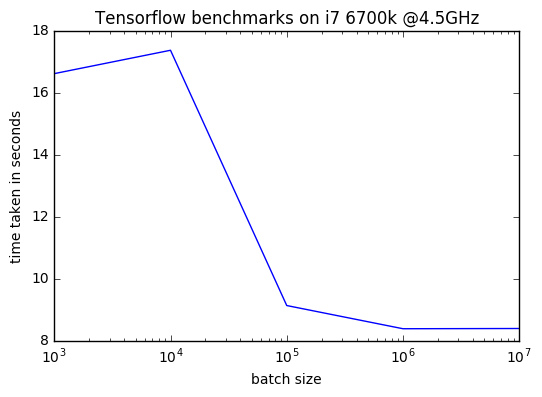

In [32]:
plt.xscale('log', nonposy='clip')
plt.plot(gbatch_size, gtime_taken)
plt.title('Tensorflow benchmarks on i7 6700k @4.5GHz')
plt.ylabel('time taken in seconds')
plt.xlabel('batch size')
print(gbatch_size)
print(gtime_taken)

# Benchmarking TensorFlow
Using the TensorFlow wrapper for gensim to train the model.

We are considering only one epoch i.e the number of training examples processed per step.
For varying batch sizes i.e the number of training examples each step processes we encounter different results.

In [29]:
tbatch_size = []
ttime_taken = []
size = 1000#0000
while size<=10000000:
    start = time.time()
    model = TfWord2Vec("text8", epochs_to_train=1, embedding_size=100, batch_size=size, num_neg_samples=0)
    tbatch_size.append(size)
    ttime_taken.append(time.time()-start)
    print("\nTensorflow:" + str(ttime_taken[-1]))
    print("Batch size:" + str(size) + "\n")
    size *= 10

Data file:  text8
Vocab size:  71290  + UNK
Words per epoch:  17005207
Epoch    1 Step    75472: lr = 0.006 words/sec =  1062082
Tensorflow:42.3120291233
Batch size:1000

Data file:  text8
Vocab size:  71290  + UNK
Words per epoch:  17005207
Epoch    1 Step     7548: lr = 0.006 words/sec =  2523470
Tensorflow:42.3120291233
Batch size:10000

Data file:  text8
Vocab size:  71290  + UNK
Words per epoch:  17005207
Epoch    1 Step      753: lr = 0.006 words/sec =  2553772
Tensorflow:42.3120291233
Batch size:100000

Data file:  text8
Vocab size:  71290  + UNK
Words per epoch:  17005207
Epoch    1 Step       73: lr = 0.003 words/sec =  2860683
Tensorflow:42.3120291233
Batch size:1000000

Data file:  text8
Vocab size:  71290  + UNK
Words per epoch:  17005207
Epoch    3 Step       12: lr = 0.000 words/sec =  1226755
Tensorflow:42.3120291233
Batch size:10000000



[1000, 10000, 100000, 1000000, 10000000]
[14.071324110031128, 12.441872119903564, 9.271472215652466, 9.260348796844482, 37.27010893821716]


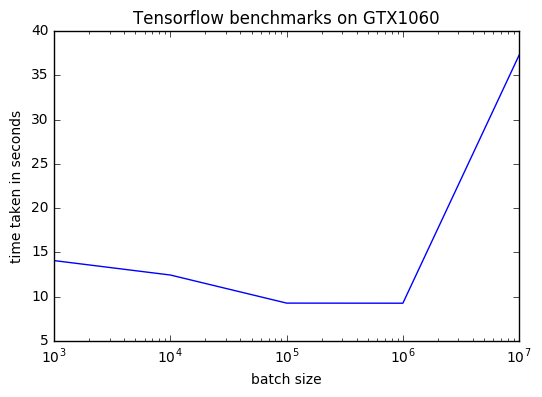

In [33]:
plt.xscale('log', nonposy='clip')
plt.plot(tbatch_size, ttime_taken)
plt.title('Tensorflow benchmarks on GTX1060')
plt.ylabel('time taken in seconds')
plt.xlabel('batch size')
print(tbatch_size)
print(ttime_taken)

Note how the time taken decreases drastically with increasing batch size.